In [2]:
from bankingSystem import * 
from helperFunctions import *
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import warnings 
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2
%pylab inline 
pylab.rcParams['figure.figsize'] = (20, 20)
pylab.rcParams['font.size'] = 20

Populating the interactive namespace from numpy and matplotlib


### model without the exogeous shock

In [19]:
con = np.load("concentrationParams.npy")
np.random.seed(1)
# simulation and data collection
simulationSteps = 500
cMatrix = np.ones((100,100))*0.8
np.fill_diagonal(cMatrix, 1)
model = bankingSystem(banksFile="balanceSheetAnalysis/banksData_2022.csv", # csv file used to initialize the bank agents
                leverageRatio = 20.0,                                     # leverage ratio upper bound for all banks
                depositReserve = 0.2,                                     # capital reserve as a ratio of portfolio value
                num_borrowing= 20,                                        # number of borrowing request per bank per step
                sizeOfBorrowing = 1.0, concentrationParameter = con,                                      # size of borrowing as a ratio of equity capital
                num_banks=100,                                            # number of banks in the system 
                alpha = 0.5,                                              # portfolio recovery rate                           
                beta = 0.9,                                               # interbank loan recovery rate
                fedRate = 0.04,                                            # interest rate on borrowing   
                portfolioReturnRate = 0.10,          
                # return rate on portfolio
                returnVolatiliy = 0.18,
                returnCorrelation = cMatrix,
                liquidityShockNum = 10,                                    # number of liquidity shocks per step      
                shockSize = 0.02,                                          # size of the shock
                shockDuration = [300, 300]) # duration of the shock
                
model.datacollector.collect(model)
for _ in range(simulationSteps):
    model.simulate()
    
agent_data = model.datacollector.get_agent_vars_dataframe()
model_data = model.datacollector.get_model_vars_dataframe()

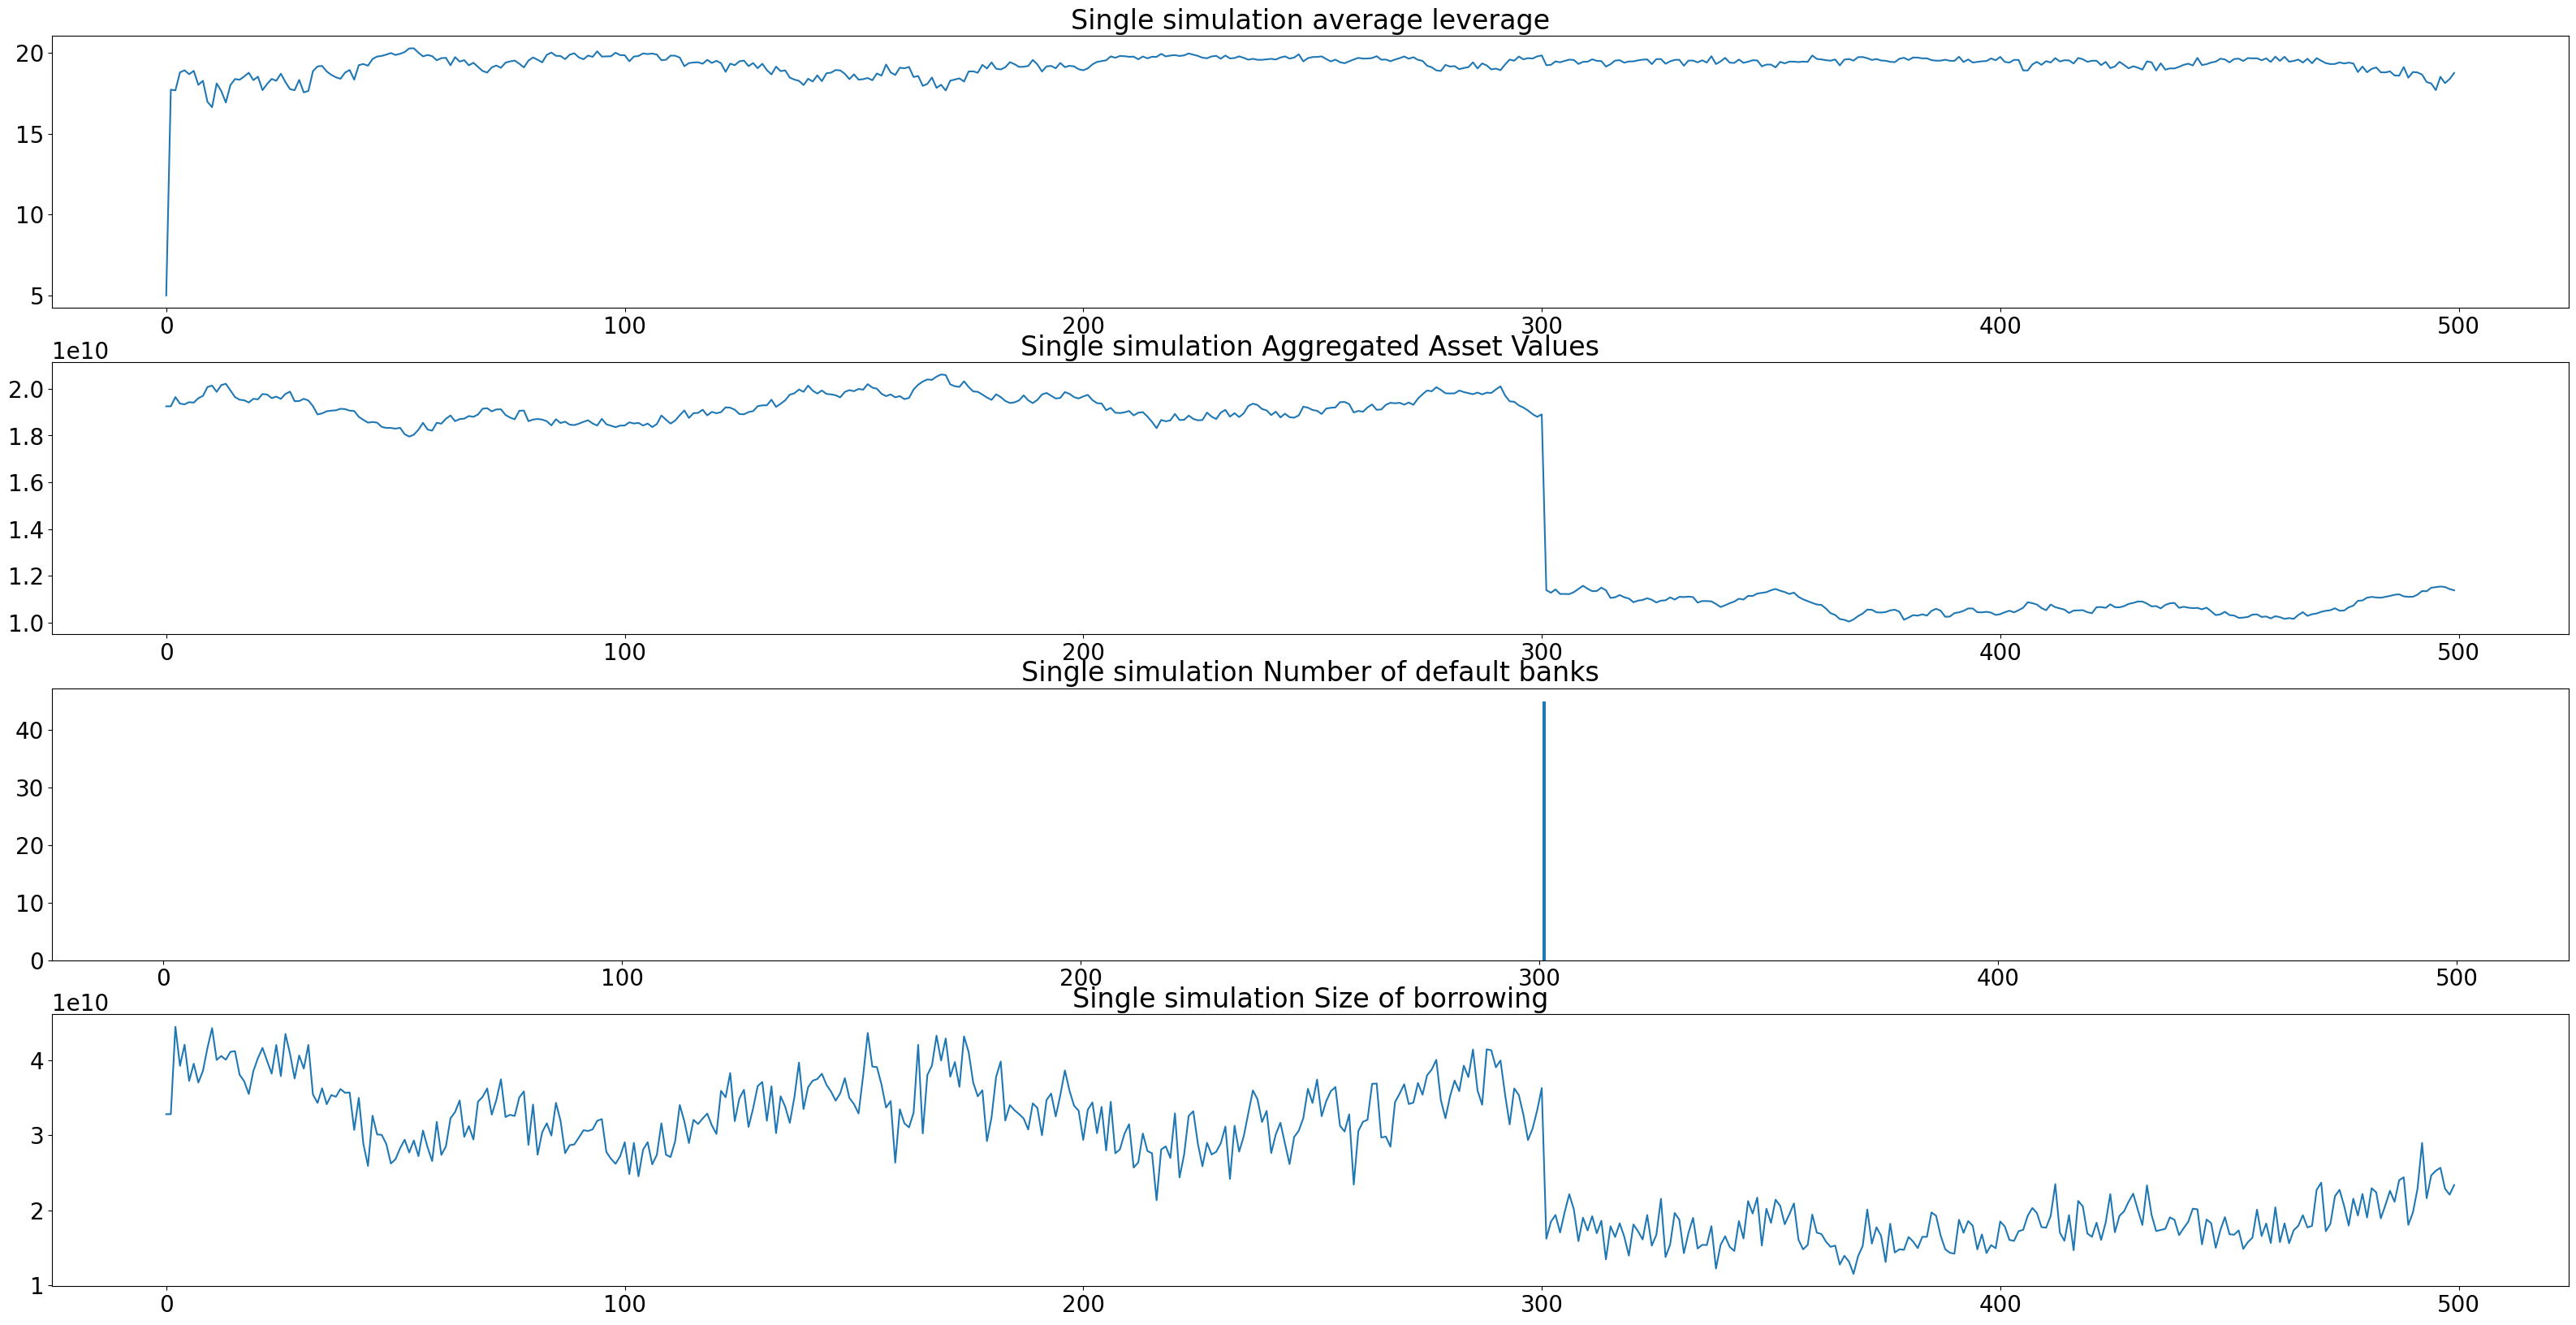

In [20]:
simulationMonitor(agent_data, model_data, simulationSteps)